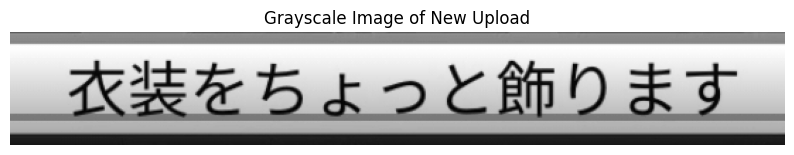

In [1]:
# Load the new image
import cv2
import matplotlib.pyplot as plt
new_image_path = 'sub.jpeg'
new_image = cv2.imread(new_image_path)

# Convert the new image to grayscale
new_gray_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(10, 10))
plt.imshow(new_gray_image, cmap='gray')
plt.title("Grayscale Image of New Upload")
plt.axis('off')
plt.show()


In [2]:
def enhance_contrast(gray_image):
    # Create CLAHE object with a clip limit of 2.0 and grid size of 8x8
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray_image)
    return enhanced


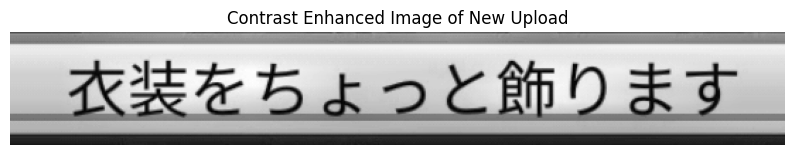

In [3]:
# Enhance the contrast of the grayscale image using CLAHE
enhanced_new_image = enhance_contrast(new_gray_image)

# Display the contrast-enhanced image
plt.figure(figsize=(10, 10))
plt.imshow(enhanced_new_image, cmap='gray')
plt.title("Contrast Enhanced Image of New Upload")
plt.axis('off')
plt.show()

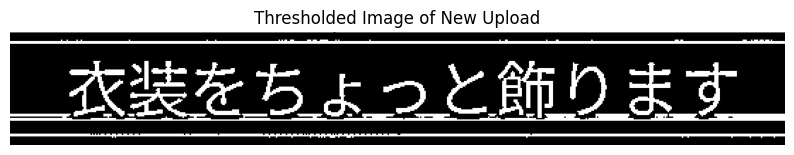

In [4]:
# Apply adaptive thresholding to the enhanced image
thresholded_new_image = cv2.adaptiveThreshold(
    enhanced_new_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 10  # Adjusted block size and constant
)

# Display the thresholded image
plt.figure(figsize=(10, 10))
plt.imshow(thresholded_new_image, cmap='gray')
plt.title("Thresholded Image of New Upload")
plt.axis('off')
plt.show()

In [ ]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR for Japanese language
ocr_model = PaddleOCR(lang='japan', use_angle_cls=True)  # Enable angle classification to detect text orientation

# Perform OCR on the thresholded image
results = ocr_model.ocr(thresholded_new_image, rec=True, cls=True)

# Extract text from the OCR results
extracted_text_paddle = "\n".join([line[1][0] for line in results[0]])  # Combine detected text lines

# Display the extracted text
extracted_text_paddle


In [5]:
from manga_ocr import MangaOcr
from PIL import Image

# Initialize Manga OCR
mocr = MangaOcr()

pil_image = Image.fromarray(thresholded_new_image)

# Perform OCR
extracted_text = mocr(pil_image)

# Display the extracted text
print("Extracted Text from Manga OCR:")
print(extracted_text)


C:\Users\demon\PycharmProjects\Adomination\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-03 00:58:50.375 | INFO     | manga_ocr.ocr:__init__:16 - Loading OCR model from kha-white/manga-ocr-base
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "_name_or_path": "facebook/deit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4

Extracted Text from Manga OCR:
衣装をちょっと飾ります


In [7]:
from deep_translator import GoogleTranslator
translated_text = GoogleTranslator(source='auto', target='en').translate(extracted_text)
print(translated_text)

Decorate your costume a little
